In [1]:
using ExcelReaders, DataFrames, Plots;
push!(LOAD_PATH, ".")

using ISCLib;

using HDF5, JLD, NIfTI, Logging, Vis, GtkReactive, ImageView, Images,
Colors;

INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/FileIO.ji for module FileIO.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/ExcelReaders.ji for module ExcelReaders.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/PlotThemes.ji for module PlotThemes.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/JLD.ji for module JLD.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/SimpleTraits.ji for module SimpleTraits.
INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/ImageView.ji for module ImageView.


In [68]:
import Vis

In [16]:
mri = (get_nii(1,1).raw);
mask = niread("out/S|segmentation_result.nii",mmap=true).raw;
mask2 = niread("out/V|segmentation_result.nii",mmap=true).raw;
mask3 = niread("out/S_V|segmentation_result.nii",mmap=true).raw;

In [32]:
vis(mri,mask2);

In [91]:
bl(x) = x>0.05
# mask_xor = bl.(mask) $ bl.(mask2);

In [193]:
@edit ImageFiltering.Pad()

In [8]:
dat = readxl(DataFrame,joinpath(PATH,"logs","1.xlsx"), "Лист1!A1:G$(NEXP+1)");

In [119]:
function blob_DoH{T,N}(img::AbstractArray{T,N}, σs, edges::Tuple{Vararg{Bool}}=(true, ntuple(d->false, Val{N})...))
    sigmas = sort(σs)
    img_LoG = Array{Float64}(length(sigmas), size(img)...)
    colons = ntuple(d->Colon(), Val{N})
    @inbounds for isigma in eachindex(sigmas)
        img_LoG[isigma,colons...] = (-sigmas[isigma]) * imfilter(img, Kernel.LoG(ntuple(d->sigmas[isigma],Val{N})))
    end
    maxima = findlocalmaxima(img_LoG, 1:ndims(img_LoG), edges)    
    [BlobLoG(CartesianIndex(x.I), sigmas[x[1]], img_LoG[x]) for x in maxima]
end

blob_DoH (generic function with 2 methods)

In [124]:
mr = zeros(mask3)
mr[mask_df] = mask3[mask_df]
blob_DoH(mr,[i for i ∈ 1:0.4:10]);

In [125]:
typeof(mr)

Array{Float64,3}

In [117]:
res = sort(ans,by=x-> -x.σ);

In [121]:
sort(res, by=x-> x.amplitude)
# filter(x->x.σ>8, res)

30109-element Array{Images.BlobLoG{Float64,Float64,4},1}:
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,33,69,6)),1.0,-6.01201e-18)  
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,33,64,6)),1.0,-4.31427e-18)  
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,43,91,24)),1.0,-2.15923e-18) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,51,60,20)),1.0,-2.03455e-18) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,28,81,11)),1.0,-7.56211e-19) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,30,90,12)),1.0,-4.75029e-19) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((7,11,39,25)),3.4,-2.68952e-19) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,37,84,34)),1.0,-2.36498e-19) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((1,33,75,67)),1.0,-2.17437e-19) 
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((8,5,18,30)),3.8,-2.0354e-19)   
 Images.BlobLoG{Float64,Float64,4}(CartesianIndex{4}((6,78,70,66)),3.0,-2.03288e-1

INFO: Recompiling stale cache file /home/ashedko/.julia/lib/v0.5/ImageMagick.ji for module ImageMagick.


,,,,,,

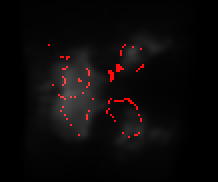
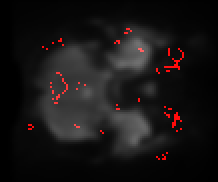
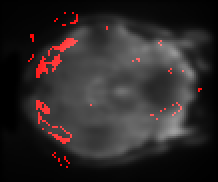
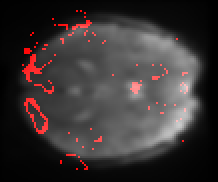
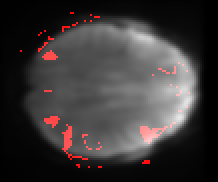
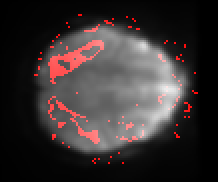
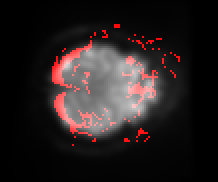

In [37]:
seq = [ImageMeta(mriseg[:,:,j]) for j in 10:10:75]

In [73]:
# map!(x->isnan(x)?0:min(abs(x),1)*sign(x),nisc)\
tail(CartesianIndex(3,5,56,6).I)

LoadError: MethodError: no method matching tail(::Tuple{Int64,Int64,Int64,Int64})
you may have intended to import Base.tail[0m
Closest candidates are:
  tail([1m[31m::DataFrames.AbstractDataFrame[0m) at /home/ashedko/.julia/v0.5/DataFrames/src/abstractdataframe/abstractdataframe.jl:291
  tail([1m[31m::DataFrames.AbstractDataFrame[0m, [1m[31m::Int64[0m) at /home/ashedko/.julia/v0.5/DataFrames/src/abstractdataframe/abstractdataframe.jl:290[0m

In [95]:
# cleared = map(x->isnan(x)?0:min(abs(x),1)*sign(x),nisc);
# length(cleared) - countnz(cleared)
# PyPlot.plt[:hist](cleared,100)
imshow(mask_df)

In [ ]:
Path = "/run/media/ashedko/5cdd1287-7dba-4138-8a1b-91148f9f8ab5/ashedko/UNC/"
data = readxlsheet(DataFrame,joinpath(Path,"logs","1.xlsx"), "Лист1");

In [ ]:
# res = map(x-> x<0.05? 0: x*2+1/29, cleared)
# res = Array{Float32}(res);
nisc

In [ ]:
map!(x->x>0.1?x*2+1/29:0, nisc)

In [ ]:
niwrite("out.nii",NIVolume(ni.header,reshape(nisc,(91,109,91))))

In [ ]:
# data = readxl(DataFrame,joinpath(PATH,"logs","2.xlsx"), "Лист1!A1:G92");
data = data[reduce(|,data[:Stimul_1] .== w for w in t),:]

In [117]:
wei_dsp = reshape(dsp,SHAPE) ./ mri
map!(x-> !isfinite(x) ? 0:x,wei_dsp);

In [118]:
normD = wei_dsp/maximum(wei_dsp);

In [89]:
normD = reshape(dsp,SHAPE)/maximum(dsp);

In [58]:
pic = Gray.(dsp/maximum(dsp));

In [92]:
mask_df = copy(bl.(mask3))
mask_df[normD .<= 0.04] .= false
mask_df;

In [14]:
# ni = get_nii(1,1)
# res = NIfTI.NIVolume(ni.header, ni.extensions,mriseg) # Cheap, as reshape returns a view
# niwrite("mask.nii",res)

In [165]:
thresh=slider(50.:1.:400.)
# mask2 = mask.*map(x-> x>signal(thresh), mri)
mric = Gray.(copy(mri)/ maximum(mri))
mriseg = RGBA.(mric)
# mriseg[mask .> 0.1] += RGBA(0.,0.,1.,0.3)
mriseg[mask_df] += RGBA(1.,0.,0.,0.4)
# mriseg[mask3 .> 0.1] += RGBA(0.,1.,0.,0.3)

zr, slicedata = roi(mric, (1,2))
gd = imshow_gui((200, 200), slicedata, (1,2))
imshow(gd["frame"][1,1], gd["canvas"][1,1], mric, nothing, zr, slicedata)
imshow(gd["frame"][1,2], gd["canvas"][1,2], mriseg, nothing, zr, slicedata)
showall(gd["window"]);

,,,,

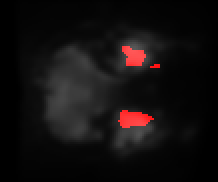
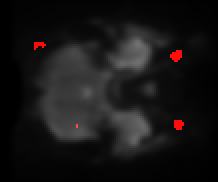
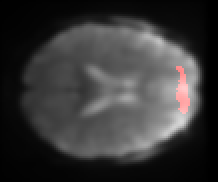
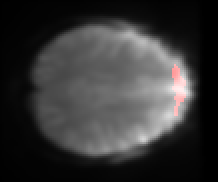
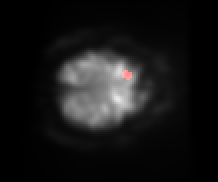

In [166]:
seq = [ImageMeta(mriseg[:,:,j]) for j in [15,20,45,55,73]]

In [88]:
@manipulate for thresh in 0.:0.01:1.
    mriseg = RGBA.(mri)
    # mriseg[mask .> 0.1] += RGBA(0.,0.,1.,0.3)
    mriseg[normD.>(thresh)] += RGBA(1.,0.,0.,0.3)
    # mriseg[mask3 .> 0.1] += RGBA(0.,1.,0.,0.3)

    zr, slicedata = roi(mri, (1,2))
    gd = imshow_gui((200, 200), slicedata, (1,2))
    imshow(gd["frame"][1,1], gd["canvas"][1,1], mri, nothing, zr, slicedata);
    imshow(gd["frame"][1,2], gd["canvas"][1,2], mriseg, nothing, zr, slicedata);
    showall(gd["window"]);
end;

Interact.Options{:SelectionSlider,Float64}(897: "input-487" = 0.5 Float64 ,"thresh",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=1, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="ImageView", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=200, default-height=400, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hi

In [ ]:
indexes = [get_indexes(i,["S1"]) for i in 1:NSUBJ]

In [50]:
@nref

LoadError: UndefVarError: @nref not defined

In [66]:
length(dsp)-countnz(dsp)

57773

In [63]:
h = histogram(sqrt.(dsp), bins=400)

In [95]:
sqrt(4maximum(ds)-1)/4

1312.5547908655835

In [85]:
ds = h5read("out/S|disps.h5","data");

In [87]:
dsp = sum(ds,2)/29;

In [88]:
dsp = (dsp)./maximum(dsp);

In [5]:
using MAT,HDF5

In [9]:
"$(11+1)"

"12"

In [8]:
disps = [load("out/$str|disps.jld")["data"] for str in ["S","V","S_V"]];

In [13]:
for i in 1:3
    h5write("out/$(["S","V","S_V"][i])|disps.h5", "data", disps[i]) 
end

In [2]:
Pkg.add("MAT")

INFO: Cloning cache of BufferedStreams from https://github.com/BioJulia/BufferedStreams.jl.git
INFO: Cloning cache of Libz from https://github.com/BioJulia/Libz.jl.git
INFO: Cloning cache of MAT from https://github.com/simonster/MAT.jl.git
INFO: Installing BufferedStreams v0.3.3
INFO: Installing Libz v0.2.4
INFO: Installing MAT v0.3.2
INFO: Building Blosc
INFO: Building HDF5
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of MAT
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [85]:
dsp = Gray.(dsp);

In [86]:
imshow(dsp)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}(Pair{String,Any}("window",Gtk.GtkWindowLeaf…
  "roi"         => Dict{String,Any}(Pair{String,Any}("redraw",92: "map(clim-map…
  "annotations" => 41: "input-34" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 40: "CLim" = ImageView.CLim{Float64}(0.0,0.09723783993496299…

In [17]:
using Interact
using Plots

In [18]:
int = 0:0.01:0.1;rnd = [sin(x)+rand()/5 for x in int];

In [23]:
function rema{T}(shadow::T, variable::T,decay::T= 0.3)
    ret= shadow*decay + variable*(1-decay)
    ret
end

function rema2{T}(shadow::T, variable::T,decay::T= 0.3)
    shadow -= (1 - decay) * (shadow - variable)
end

smooth(x,dec) = begin
    s = zeros(x)
    s[1] = x[1]
    for i=2:length(x)
        s[i] = rema2(s[i-1],x[i],dec)
    end
    s
end

smooth (generic function with 1 method)

In [24]:
@manipulate for dec=0.:0.01:1
#     plot(int,rnd)    
    plot(int,smooth(rnd,dec))
end

Interact.Options{:SelectionSlider,Float64}(23: "input-7" = 0.5 Float64 ,"dec",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.01"=>0.01,"0.02"=>0.02,"0.03"=>0.03,"0.04"=>0.04,"0.05"=>0.05,"0.06"=>0.06,"0.07"=>0.07,"0.08"=>0.08,"0.09"=>0.09…),Dict(0.54=>"0.54",0.86=>"0.86",0.09=>"0.09",0.35=>"0.35",0.22=>"0.22",0.38=>"0.38",0.56=>"0.56",0.2=>"0.2",0.89=>"0.89",0.06=>"0.06"…)),Any[],Any[],true,"horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.02 
 
 
 0.04 
 
 
 0.06 
 
 
 0.08 
 
 
 0.10 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 0.20 
 
 
 
 
 
 
 y1

best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best
best


smooth (generic function with 1 method)

In [25]:
sin(0.1)

0.09983341664682815

In [29]:
(x->rema!(a,x))(5.)

3.8

In [10]:
smooth([1,12.,32,321],0.1)

4-element Array{Float64,1}:
   1.0  
  12.9  
  43.61 
 360.249

In [37]:
imfilter(randn(30,30,30),centered(randn(3,3,3)))

30×30×30 Array{Float64,3}:
[:, :, 1] =
  2.84234    2.73791    -1.33823   …  -1.82963   10.0942    -3.23724  
 -2.3071    -4.72202    -1.77567      -4.45897    5.37238    6.77418  
 -4.92693   -0.404261   -6.09005      -1.67537   -7.32463   -1.23421  
 -0.555088  -2.15065     1.46163      -3.4045    -1.54409    0.773863 
 -3.3578    -0.405063   -5.08564       7.06363    1.30526    5.58753  
 -2.27707   -2.65706    -0.890614  …  -2.62123   -0.249389  -1.14534  
  4.56588    1.2955     -0.926548     -1.08127   -0.14448   -1.3951   
  6.02267    3.93367     8.81481      -4.25724    4.51523   -1.23347  
  2.63732   -0.827145    0.783878      2.56394    1.20021   -1.64063  
 -0.975586   0.412053    0.975754      0.696972   7.93264   -1.2826   
 -2.6741    -6.10674     6.28816   …  -0.410478   3.51319    4.76971  
  1.25029    0.339257   -0.508266      6.0019     2.92308    2.08534  
 -2.72203   -7.62906    -0.703179     -3.26281   -1.25235   -3.01433  
  ⋮                                ⋱  

In [33]:
c = colormap("oranges", 255)

In [14]:
@edit colormap("green")